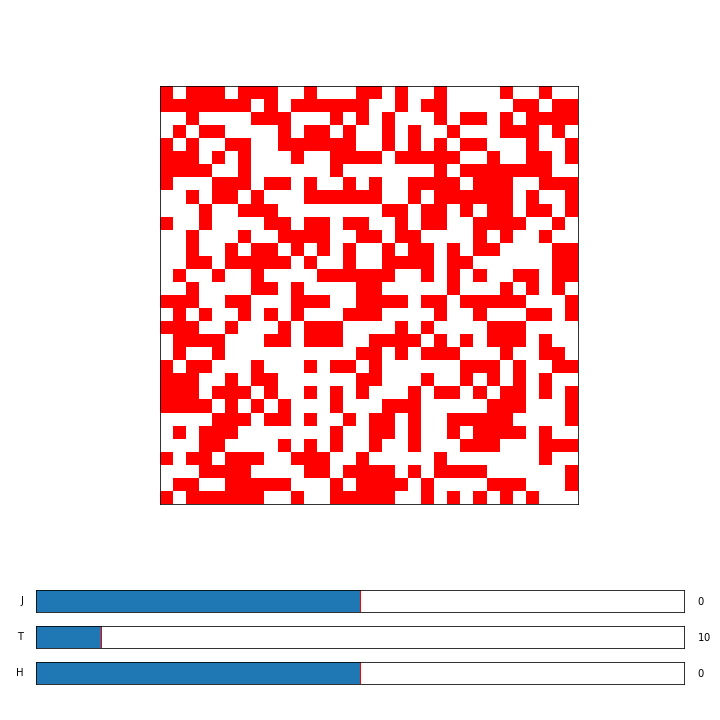

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib as mpl
from matplotlib.widgets import Slider
from IPython.display import HTML
import mpld3
from mpld3 import plugins, utils

def initialize_lattice_random(nrow, ncol):
    return np.where(np.random.random((nrow, ncol)) > 0.5, 1, -1)

def energy(lattice, J, H):
    rows,cols = lattice.shape
    energy=0
    for i in range(rows):
        for j in range(cols):
            adj=lattice[i,(j+1)%cols]+lattice[i,(j-1)%cols]+lattice[(i+1)%rows,j]+lattice[(i-1)%rows,j]
            energy-=lattice[i,j]*(J*adj+H)
    return energy/4

def deltaE(lattice,i,j,J,H):
    rows,cols = lattice.shape
    adj=lattice[i,(j+1)%cols]+lattice[i,(j-1)%cols]+lattice[(i+1)%rows,j]+lattice[(i-1)%rows,j]
    return 2*lattice[i,j]*(J*adj+H)

def step(lattice,i,j,J,H,T):
    dE=deltaE(lattice,i,j,J,H)
    p=np.random.random()
    if dE<0 or (T!=0 and np.exp((-dE)/T))>p:
        lattice[i,j] = -lattice[i,j]

def run():
    fig= plt.figure(figsize=(10,10))
    ax=fig.add_subplot()
    plt.subplots_adjust(bottom=0.3)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    cmap = mpl.colors.ListedColormap(['white', 'red'])
    ax_H = plt.axes([0.05, 0.05, 0.9, 0.03])
    ax_T = plt.axes([0.05, 0.10, 0.9, 0.03])
    ax_J = plt.axes([0.05, 0.15, 0.9, 0.03])
    s_H = Slider(ax_H, r'H', -5, 5, valinit=0, valstep=0.2)
    s_T = Slider(ax_T, r'T', 0, 100, valinit=10, valstep=2)
    s_J = Slider(ax_J, r'J', -10, 10, valinit=0, valstep=0.2)
    
    rows,cols=32,32
    N=rows*cols//10
    lattice = initialize_lattice_random(rows, cols)

    def update(i):
        H=s_H.val
        T=s_T.val
        J=s_J.val
        ax.cla()
        rng = np.random.default_rng()
        rands=rng.integers(0,[rows,cols],size=(N,2))
        for k in range(N):
            i,j=rands[k]
            step(lattice,i,j,J,H,T)
        heatmap = ax.imshow(lattice,cmap=cmap,vmin=-1,vmax=1)
        return heatmap,
    s_H.on_changed(update)
    s_T.on_changed(update)
    s_J.on_changed(update)
    ani = animation.FuncAnimation(fig, update, interval=1,blit=True)
    #plt.show()
    HTML(ani.to_html5_video())


run()